In [2]:
import os
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

def load_workbooks(folder_path):
    """
    Load all Excel workbooks in a given folder.

    Args:
    folder_path (str): The path to the folder containing the Excel files.

    Returns:
    dict: A dictionary containing the workbook names as keys and the loaded workbook objects as values.
    """
    workbooks = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.xlsx'):
            path = os.path.join(folder_path, filename)
            workbook = openpyxl.load_workbook(path)
            workbooks[filename] = workbook
    return workbooks

# Example usage:
# folder_path = '/path/to/your/folder'
# loaded_workbooks = load_workbooks(folder_path)
# print(loaded_workbooks)

folder_path = './4M NaCl/'
loaded_workbooks = load_workbooks(folder_path)
print(loaded_workbooks)

{'4M NaCl heated 80°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x16056c460>, '4M NaCl cold 0°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x16056c130>, '4M NaCl heated 90°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x16056c2e0>, 'DI water.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x16056d450>, '4M NaCl ambient.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x16056f280>, '4M NaCl heated 70°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x1605c8b50>}


In [3]:
import os
import openpyxl
from openpyxl.utils.exceptions import InvalidFileException

def load_workbooks(folder_path):
    workbooks = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.xlsx'):
            path = os.path.join(folder_path, filename)
            try:
                workbook = openpyxl.load_workbook(path)
                workbooks[filename] = workbook
            except (InvalidFileException, BadZipFile) as e:
                print(f"Error loading {filename}: {e}")
    return workbooks

# Example usage
folder_path = './4M NaCl/'
loaded_workbooks = load_workbooks(folder_path)
print(loaded_workbooks)


{'4M NaCl heated 80°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x10d2704c0>, '4M NaCl cold 0°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x10d2735e0>, '4M NaCl heated 90°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x10d273f10>, 'DI water.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x1605efc70>, '4M NaCl ambient.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x1605edd20>, '4M NaCl heated 70°C.xlsx': <openpyxl.workbook.workbook.Workbook object at 0x1605edd80>}


4M NaCl ambient.xlsx
Total number of rows: 10. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75]
4M NaCl cold 0°C.xlsx
Total number of rows: 10. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75]
4M NaCl heated 70°C.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75, 95]
4M NaCl heated 80°C.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75, 97]
4M NaCl heated 90°C.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75, 97]
DI water.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 92.5, 92.5]


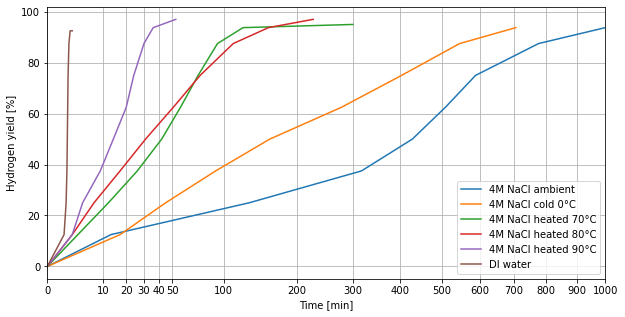

None


In [11]:
def load_data(folder_path):
    #loaded_workbooks = load_workbooks(folder_path)
    fig, (a1) = plt.subplots(1)
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.xlsx'):
            path = os.path.join(folder_path, filename)
            wb = openpyxl.load_workbook(path)
            ws = wb['Feuil1']
            print(filename)
            print('Total number of rows: '+str(ws.max_row)+'. And total number of columns: '+str(ws.max_column))
            time_min = [ws.cell(row=i,column=1).value for i in range(2,ws.max_row+1)]
            time_sec = [ws.cell(row=i,column=2).value for i in range(2,ws.max_row+1)]
            H2_vol = [ws.cell(row=i,column=3).value for i in range(2,ws.max_row+1)]
            H2_yield = [ws.cell(row=i,column=4).value for i in range(2,ws.max_row+1)]
            print(H2_yield)
            
            solution=os.path.splitext(filename)[0]
            a1.plot(time_min, H2_yield, label=solution) 
    a1.set(xlabel='Time [min]',ylabel='Hydrogen yield [%]')
    a1.legend(loc='lower right')
    a1.set_xlim([0, 1000])
    
    f = lambda a: np.sqrt(a)
    g = lambda b: b**2
    a1.set_xscale('function', functions=(f, g))
    
    from matplotlib.ticker import FixedLocator
    # Calculate custom x-ticks and labels
    x_ticks = np.arange(0, 51, 10).tolist()  # Up to 100, every 10
    x_ticks += [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    # Apply the custom x-ticks and labels
    #a3.set_xticks(x_ticks)
    #ax.set_xticklabels(x_labels)
    a1.xaxis.set_major_locator(FixedLocator(x_ticks))
    a1.grid()
    plt.gcf().set_size_inches(10,5)
    plt.show()
    fig.savefig('./fig/h2_4MNaCl.png', dpi=300)

    
    
    
folder_path = './4M NaCl/'
loaded_data = load_data(folder_path)
print(loaded_data)

0.6M NaCl ambient.xlsx
Total number of rows: 10. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75]
0.6M NaCl heated 70°C.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75, 95]
0.6M NaCl heated 80°C.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75, 95]
DI water.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 92.5, 92.5]


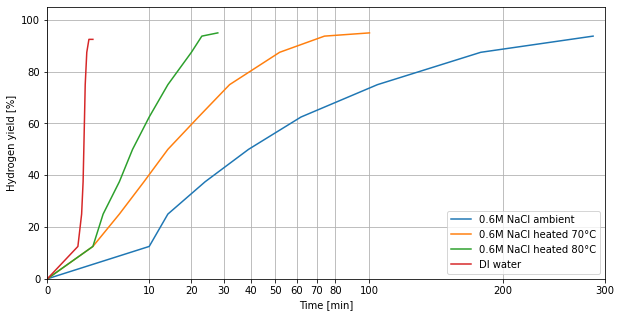

None


In [12]:
def load_data(folder_path):
    #loaded_workbooks = load_workbooks(folder_path)
    fig, (a1) = plt.subplots(1)
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.xlsx'):
            path = os.path.join(folder_path, filename)
            wb = openpyxl.load_workbook(path)
            ws = wb['Feuil1']
            print(filename)
            print('Total number of rows: '+str(ws.max_row)+'. And total number of columns: '+str(ws.max_column))
            time_min = [ws.cell(row=i,column=1).value for i in range(2,ws.max_row+1)]
            time_sec = [ws.cell(row=i,column=2).value for i in range(2,ws.max_row+1)]
            H2_vol = [ws.cell(row=i,column=3).value for i in range(2,ws.max_row+1)]
            H2_yield = [ws.cell(row=i,column=4).value for i in range(2,ws.max_row+1)]
            print(H2_yield)
            
            solution=os.path.splitext(filename)[0]
            a1.plot(time_min, H2_yield, label=solution) 
    a1.set(xlabel='Time [min]',ylabel='Hydrogen yield [%]')
    a1.legend(loc='lower right')
    a1.set_ylim([0, 105])
    a1.set_xlim([0, 300])
    
    f = lambda a: np.sqrt(a)
    g = lambda b: b**2
    a1.set_xscale('function', functions=(f, g))
    
    from matplotlib.ticker import FixedLocator
    # Calculate custom x-ticks and labels
    x_ticks = np.arange(0, 81, 10).tolist()  # Up to 100, every 10
    x_ticks += [100, 200, 300]
    
    # Apply the custom x-ticks and labels
    #a3.set_xticks(x_ticks)
    #ax.set_xticklabels(x_labels)
    a1.xaxis.set_major_locator(FixedLocator(x_ticks))
    a1.grid()
    plt.gcf().set_size_inches(10,5)
    plt.show()
    fig.savefig('./fig/h2_0.6MNaCl.png', dpi=300)

    
    
    
folder_path = './0.6M NaCl/'
loaded_data = load_data(folder_path)
print(loaded_data)

0.6M NaCl ambient.xlsx
Total number of rows: 10. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75]
DI water.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 92.5, 92.5]
Seawater ambient.xlsx
Total number of rows: 10. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75]
Seawater and 0.001M caffeine.xlsx
Total number of rows: 8. And total number of columns: 4
[0, 7.5, 25, 81.25, 98.75, 100, 100]
Seawater and 0.02M imidazole.xlsx
Total number of rows: 10. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75]
Seawater heated 70°C.xlsx
Total number of rows: 11. And total number of columns: 4
[0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 93.75, 100]


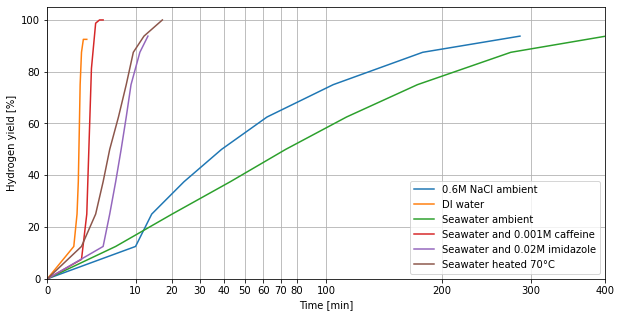

None


In [16]:
def load_data(folder_path):
    #loaded_workbooks = load_workbooks(folder_path)
    fig, (a1) = plt.subplots(1)
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.xlsx'):
            path = os.path.join(folder_path, filename)
            wb = openpyxl.load_workbook(path)
            ws = wb['Feuil1']
            print(filename)
            print('Total number of rows: '+str(ws.max_row)+'. And total number of columns: '+str(ws.max_column))
            time_min = [ws.cell(row=i,column=1).value for i in range(2,ws.max_row+1)]
            time_sec = [ws.cell(row=i,column=2).value for i in range(2,ws.max_row+1)]
            H2_vol = [ws.cell(row=i,column=3).value for i in range(2,ws.max_row+1)]
            H2_yield = [ws.cell(row=i,column=4).value for i in range(2,ws.max_row+1)]
            print(H2_yield)
            
            solution=os.path.splitext(filename)[0]
            a1.plot(time_min, H2_yield, label=solution) 
    a1.set(xlabel='Time [min]',ylabel='Hydrogen yield [%]')
    a1.legend(loc='lower right')
    a1.set_ylim([0, 105])
    a1.set_xlim([0, 400])
    
    f = lambda a: np.sqrt(a)
    g = lambda b: b**2
    a1.set_xscale('function', functions=(f, g))
    
    from matplotlib.ticker import FixedLocator
    # Calculate custom x-ticks and labels
    x_ticks = np.arange(0, 81, 10).tolist()  # Up to 100, every 10
    x_ticks += [100, 200, 300, 400]
    
    # Apply the custom x-ticks and labels
    #a3.set_xticks(x_ticks)
    #ax.set_xticklabels(x_labels)
    a1.xaxis.set_major_locator(FixedLocator(x_ticks))
    a1.grid()
    plt.gcf().set_size_inches(10,5)
    plt.show()
    fig.savefig('./fig/h2_SW.png', dpi=300)

    
    
    
folder_path = './SW/'
loaded_data = load_data(folder_path)
print(loaded_data)